In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 3
setup_one_gpu(GPU)

Picking GPU 3


In [2]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from general_tools.notebook.tf import reset_tf_graph

import tf_lab.point_clouds.in_out as pio

from tf_lab.point_clouds.in_out import PointCloudDataSet, write_model_ids_of_datasets

from tf_lab.point_clouds.autoencoder import Configuration as Conf

from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id
                                                  
from general_tools.in_out.basics import create_dir, files_in_subdirs

from general_tools.simpletons import select_first_last_and_k

from geo_tool import Point_Cloud

from tf_lab.point_clouds.gan import model_saver_id

from tf_lab.nips.shape_net import pc_loader as sn_pc_loader

from tf_lab.point_clouds.raw_gan import RawGAN

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator, convolutional_discriminator,\
                                                          point_cloud_generator, leaky_relu, mlp_discriminator

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
save_model = True
save_synthetic_samples = True
class_name = raw_input('Give me the class type.\n').lower()
syn_id = shape_net_category_to_synth_id()[class_name]
synthetic_data_out_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/NIPS/our_samples/'

do_training = True
do_plotting = True
n_pc_samples = 2048

max_epochs = 1500
arch_tag = 'mlp_arch'
leak = 0.2
dropout_prob = 0.5

discriminator = mlp_discriminator
adaptive_training = None

beta = 0.5
disc_kwargs = {'non_linearity': leaky_relu(leak), 'dropout_prob': dropout_prob}
    
generator = point_cloud_generator
gen_kwargs = {'b_norm': False, 'layer_sizes':[64, 128, 256, 512, 1024], 'dropout_prob':dropout_prob}
experiment_name = class_name + '_'+ arch_tag + '_raw_gan_' + str(n_pc_samples) +  '_pts'

Give me the class type.
sofa


In [5]:
top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'
train_dir = osp.join(top_data_dir, 'OUT/models/nips/gan/raw_gan')
train_dir = osp.join(train_dir, experiment_name)
create_dir(train_dir)

full_pclouds_path = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/centered/', str(n_pc_samples))
full_pclouds_path = osp.join(full_pclouds_path, syn_id)
full_file_names = pio.load_filenames_of_input_data(full_pclouds_path, '.ply')
full_pclouds, full_model_ids, full_syn_ids = pio.load_crude_point_clouds(file_names=full_file_names,
                                                                           n_threads=25, loader=sn_pc_loader)
print '%d files containing complete point clouds were found.' % (len(full_pclouds), )

3173 files containing complete point clouds were found.


In [6]:
training_data = PointCloudDataSet(full_pclouds)

batch_size = 50
noise_params = {'mu':0, 'sigma': 0.5}
noise_dim = 512
init_lr = 0.0001

n_syn_samples = training_data.num_examples  # Same number as original GT data.

In [ ]:
reset_tf_graph()

gan = RawGAN(experiment_name, init_lr, [n_pc_samples, 3], noise_dim,
             discriminator, generator, beta=beta, gen_kwargs=gen_kwargs, disc_kwargs=disc_kwargs)

accum_syn_data = []
train_stats = []

1 (1.373325094344124, 0.71742580618177143) 19.7478191853
2 (1.3784036371443007, 0.71197559152330669) 18.9980499744
3 (1.3636951862819611, 0.71773465379836066) 19.11865592
4 (1.352525792424641, 0.73332466397966656) 19.2291491032
5 (1.3158161432024031, 0.77013552472704938) 19.2295138836
6 (1.2398401612327212, 0.84779274652874659) 19.2584490776
7 (1.1227442811405848, 1.002603656715817) 19.2707469463
8 (0.99123718530412708, 1.1604439105306352) 19.2838549614
9 (0.92816324744905743, 1.2411691442368522) 19.3757658005
10 (0.82059073921233894, 1.3840051492055256) 19.3396279812
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/sofa_mlp_arch_raw_gan_2048_pts/models.ckpt-10 is not in all_model_checkpoint_paths. Manually adding it.


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


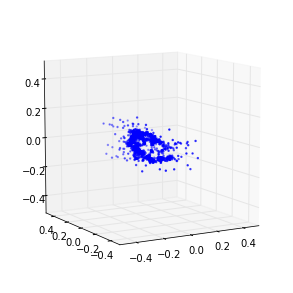

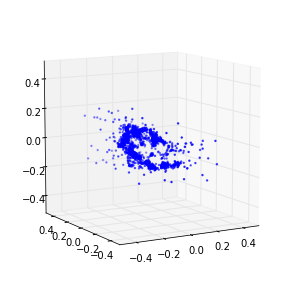

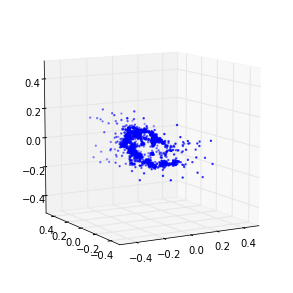

11 (0.71708266697232681, 1.5107485879035223) 19.2607810497
12 (0.78645331045937916, 1.6645709929012118) 19.2832629681
13 (1.0578579070076111, 1.3802272999097431) 19.505092144
14 (1.1114930075312417, 1.0742434282151481) 19.4092669487
15 (0.96342691921052481, 1.1870954840902299) 19.342356205
16 (0.96905820615707883, 1.1790733100875976) 19.5276730061
17 (0.96265002186336213, 1.1310834193986559) 19.5161669254
18 (1.0094325353228857, 1.1770306002526056) 19.5149850845
19 (1.0039779146512349, 1.147755277535272) 19.4530720711
20 (1.0407638644415236, 1.1824441211564201) 19.4227831364
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/sofa_mlp_arch_raw_gan_2048_pts/models.ckpt-20 is not in all_model_checkpoint_paths. Manually adding it.


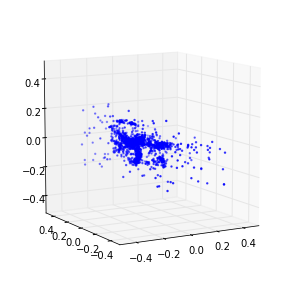

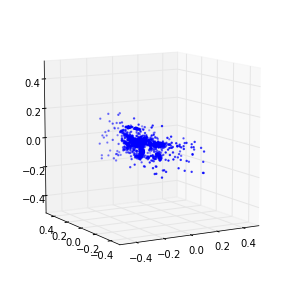

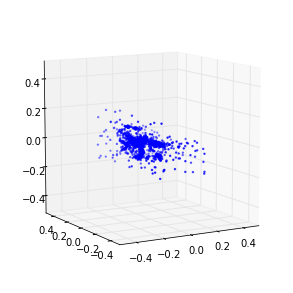

21 (0.96909672873360775, 1.1815573710297782) 19.2475090027
22 (0.98756513614503161, 1.170543114344279) 19.2907679081
23 (1.0025168922212389, 1.1498111368171753) 19.5491161346
24 (1.0482884144026137, 1.1228491872076005) 19.4249179363
25 (1.0677733686235216, 1.0996522326318046) 19.4323260784
26 (1.0527821504880512, 1.075796405474345) 19.5676970482
27 (1.091199158676087, 1.0877914452363575) 19.5226349831
28 (1.0637226644016446, 1.0577430857552423) 19.3352930546
29 (1.0481835783474029, 1.0670048126152583) 19.3560340405
30 (1.0887272622850206, 1.0349108434858776) 19.5172951221
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/sofa_mlp_arch_raw_gan_2048_pts/models.ckpt-30 is not in all_model_checkpoint_paths. Manually adding it.


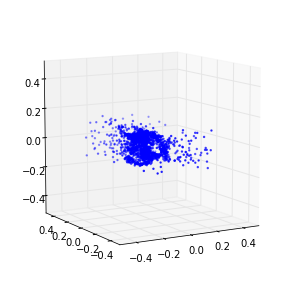

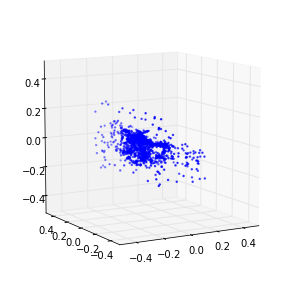

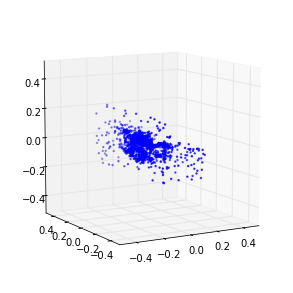

31 (1.0905460327390641, 1.0591874907887171) 19.1623430252
32 (1.0962180523645311, 1.0578021303055778) 19.3201580048
33 (1.0560130297191559, 1.0300902175524878) 19.343971014
34 (1.0993264203979856, 1.0555087200232915) 19.3377139568
35 (1.0918888657812089, 1.0589248717777313) 19.3561661243
36 (1.0630947767742096, 1.0559854356069414) 19.4148759842
37 (1.1159036093287997, 1.0349677668677435) 19.4529988766
38 (1.0638424186479478, 1.0283538263941567) 19.4062268734
39 (1.0792800150220356, 1.0337098619294545) 19.3195290565


In [ ]:
if do_training:
    for _ in range(max_epochs + 1):
        loss, duration = gan._single_epoch_train(training_data, batch_size, noise_params, adaptive=adaptive_training)
        epoch = int(gan.sess.run(gan.epoch.assign_add(tf.constant(1.0))))
        print epoch, loss, duration
        if save_model and epoch % 10 == 0:
            checkpoint_path = osp.join(train_dir, model_saver_id)
            gan.saver.save(gan.sess, checkpoint_path, global_step=gan.epoch)
            syn_d = gan.generate(n_syn_samples, noise_params)
            accum_syn_data.append(syn_d)
            for k in range(3):
                Point_Cloud(syn_d[k]).plot(in_u_sphere=True)
        train_stats.append((epoch,) + loss)

In [ ]:
# epoch_to_check = 1000
# n_check = 10
# check_data = accum_syn_data[epoch_to_check-1]
# rids = np.random.choice(range(len(check_data)), size=n_check, replace=False)
# for i in range(n_check):
#     Point_Cloud(check_data[rids[i]]).plot()    

In [ ]:
if do_plotting:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss)
    plt.plot(x, g_loss)
    plt.title('Raw GAN training. (%s, %s)' % (class_name, arch_tag) )
    plt.legend(['d_loss', 'g_loss'], loc=0)
    plt.xlabel('Epochs.')
    plt.ylabel('Loss.')

In [ ]:
if save_synthetic_samples:    
    save_dir = osp.join(synthetic_data_out_dir, experiment_name)
    create_dir(save_dir)
    epochs_to_save = range(1, max_epochs, 10) # Save every 10 epochs
    for i in epochs_to_save:
        np.savez(osp.join(save_dir, 'epoch_' + str(i)), accum_syn_data[i-1])